In [1]:
%matplotlib notebook

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation

## Perceptron Learning Algorithm - Linearly separable data
<img src="https://miro.medium.com/v2/resize:fit:1032/1*PbJBdf-WxR0Dd0xHvEoh4A.png"></img>

In [3]:
# Two input Classifier

# Input
x=np.array([[0,0],[0,1],[1,0],[1,1]])

# Output
y=np.array([0,1,1,1])

<IPython.core.display.Javascript object>


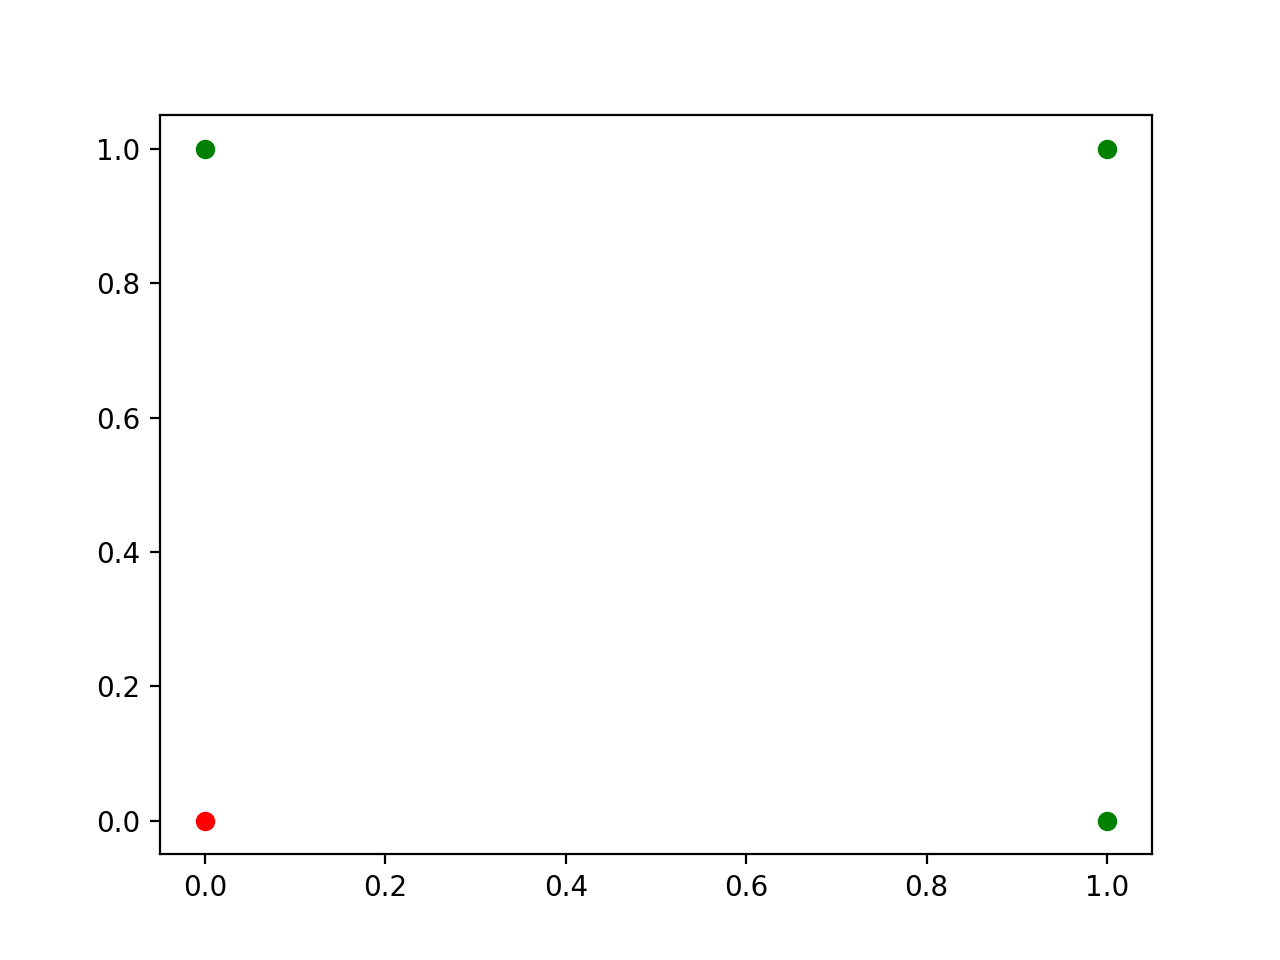

In [4]:
plt.figure(1)
for i in range(len(y)):
    if y[i]==0:
        plt.scatter(x[i][0],x[i][1],color='r')
    elif y[i]==1:
        plt.scatter(x[i][0],x[i][1],color='g')

In [5]:
def error_calc():
            e=0
            for i in range(len(y)):
                xu=np.array([1]+list(x[i]))
                if (y[i]==1 and np.sum(w@xu)<0) or (y[i]==0 and np.sum(w@xu)>0) :
                    e=e+1
            error.append(e)

In [6]:
w=np.random.randn(1,3)
w_m=[w]
conv=False

error=[]
error_calc()

while(not conv):
    for i in range(len(y)):
        xu=np.array([1]+list(x[i]))
        if y[i]==1 and np.sum(w@xu)<0:
            w=w+xu
            w_m.append(w)
            error_calc()
            
            
        elif y[i]==0 and np.sum(w@xu)>0:
            w=w-xu
            w_m.append(w)
            error_calc()
            
    if error[-1]==0:
        conv=True


<IPython.core.display.Javascript object>


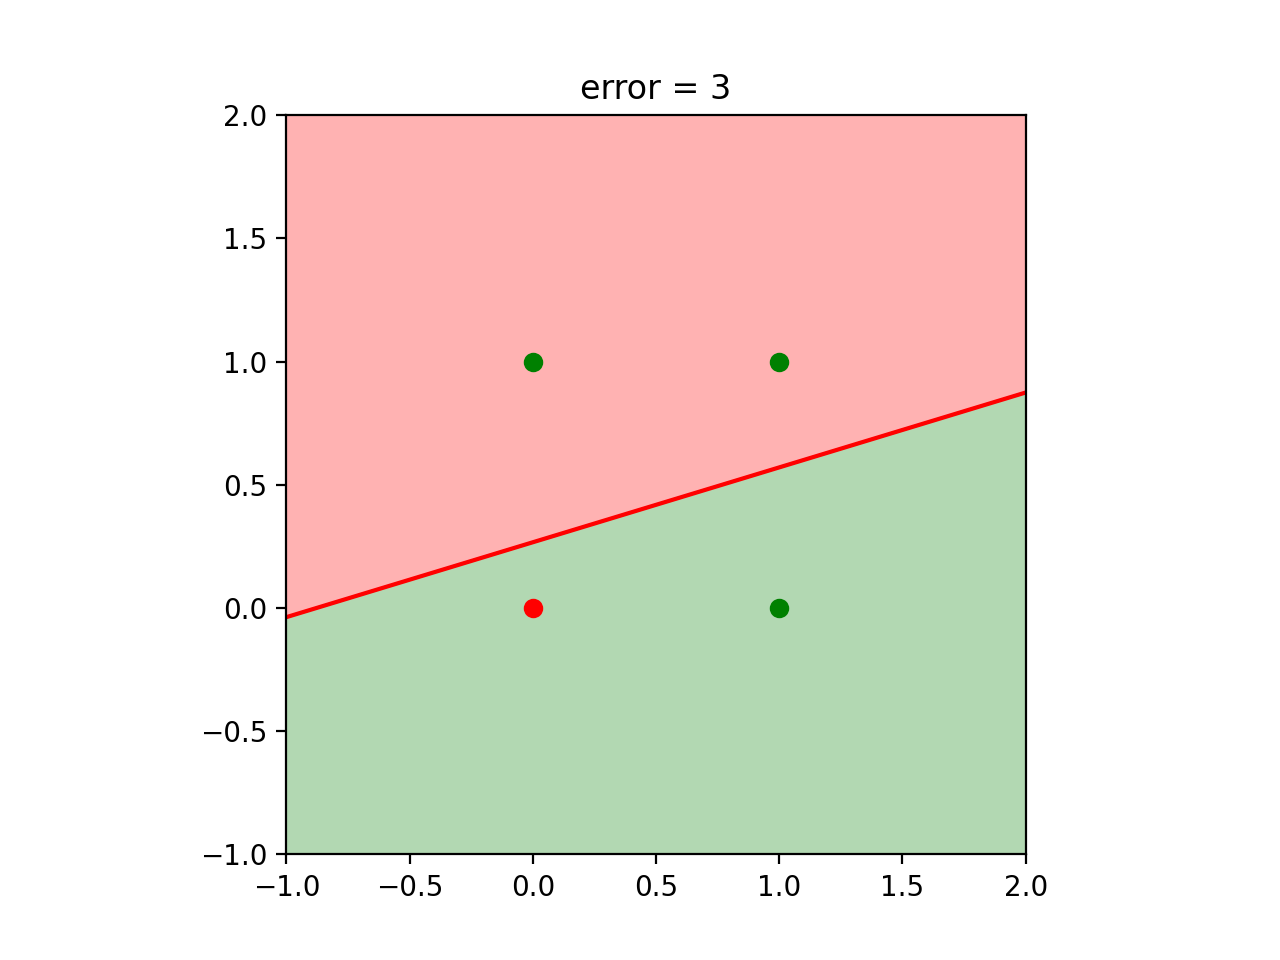

In [7]:
fig = plt.figure()
ax = plt.axes()
ax.set_aspect('equal')


def animate(n):
        ax.clear()
        wi = w_m[n]
        xi = np.linspace(-10, 10, 100)
        yi = -(wi[0][0] + wi[0][1] * xi) / wi[0][2]
        ax.set_xlim([-1,2])
        ax.set_ylim([-1,2])
        ax.plot(xi,yi, color="red")
        ax.set_title(f"error = {error[n]}")
        ax.fill_between(xi, 5*wi[0][2]/abs(wi[0][2]) , yi, color='green', alpha=0.3,
                 interpolate=True)
        ax.fill_between(xi, -5*wi[0][2]/abs(wi[0][2]) , yi, color='red', alpha=0.3,
                 interpolate=True)
        
        
        for i in range(len(y)):
            if y[i] == 0:
                plt.scatter(x[i][0], x[i][1], color='r')
            elif y[i] == 1:
                plt.scatter(x[i][0], x[i][1], color='g')
        
anim = FuncAnimation(fig,animate,frames=len(w_m), interval=1000)
# anim.save('test_trajectory_animation.gif')
plt.show()